In [1]:
import pandas as pd

In [2]:
# samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='ISO-8859-1')
samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]

In [3]:
samples.head()

,likes,replies,quotes,retweets,searchQuery,clean_content,tanggal,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
0,0,0,0,0,#gibran,result togel november jogjatoto palembang pool...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
1,0,0,0,0,#gibran,result togel november jogjatoto sunda pools co...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
2,0,0,0,0,#gibran,result togel november jogjatoto belarusia pool...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,0,0,0,0,#gibran,result togel november jogjatoto toto macau sea...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
4,0,0,0,0,#cakimin,politik muhaiminiskandar cakimin mahasiswaunis...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [6]:
# samples.isnull().sum()
# samples.isnull().sum().sum()

In [9]:

samples["clean_content"].describe()

count                                                  5830
unique                                                 3940
top       jokowimenyerahlah mundur ketua mk freepalaesti...
freq                                                     37
Name: clean_content, dtype: object

In [11]:
samples.describe()

,likes,replies,quotes,retweets,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos
count,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000
mean,156.454374,35.033276,4.195540,77.761578,0.008203,0.035164,0.013584,0.005657,0.983175,0.011175
std,1085.247184,387.327978,36.977125,582.525123,0.088965,0.149378,0.137684,0.034230,0.062205,0.050920
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.980500,0.000000,0.244000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30892.000000,7544.000000,1079.000000,16926.000000,1.000000,1.000000,0.911800,0.756000,1.000000,0.730000


In [13]:
len(samples['clean_content'].unique())

3940

In [18]:
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 26


array(['#gibran', '#cakimin', 'mahfud', 'gibran', '#mahfudmd', '#mahfud',
       '#muhaimin', 'cakimin', 'muhaimin', 'mahfudmd', 'anies', '#ganjar',
       'prabowo', '#prabowo', '#anies', 'ganjar', '#mahfudmd #ganjar',
       '#cakimin #anies', 'anies cakimin', 'anies muhaimin',
       '#gibran #prabowo', 'prabowo gibran', 'ganjar mahfudmd',
       '#muhaimin #anies', 'ganjar mahfud', '#mahfud #mahfud'],
      dtype=object)

In [20]:
samples['clean_content'].nunique()

3940

## Text Statistics

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_2024/1680436398.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samples['likes'],color='m',shade=True)


Text(0.5, 0, 'sentiment')

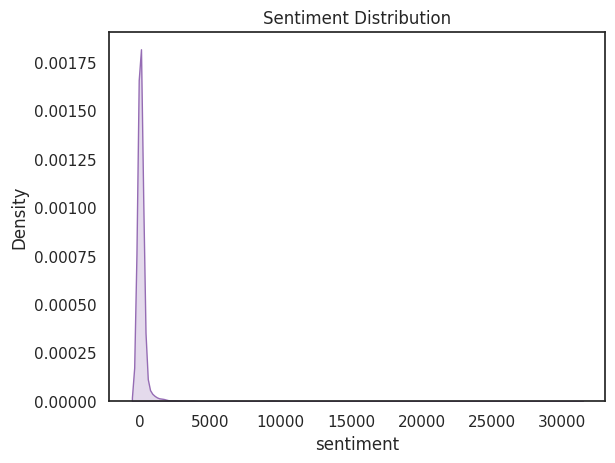

In [28]:
# plt.figure(samples['clean_content'].str.len().hist(alpha=0.3))
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(samples['likes'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<Axes: >

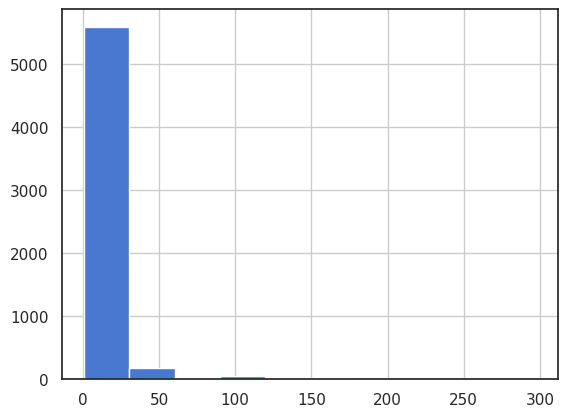

In [29]:
samples['clean_content'].str.split().map(lambda x: len(x)).hist()

## Analyzing Word Lenght

Text(0.5, 0, 'Number of Words')

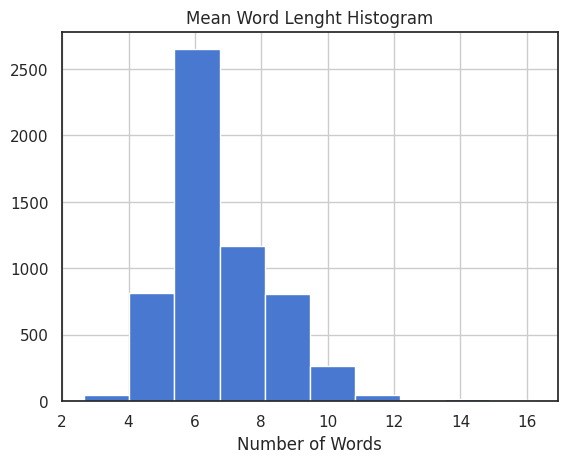

In [40]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Mean Word Lenght Histogram')
plt.xlabel('Number of Words')

Text(0.5, 0, 'Number of Words')

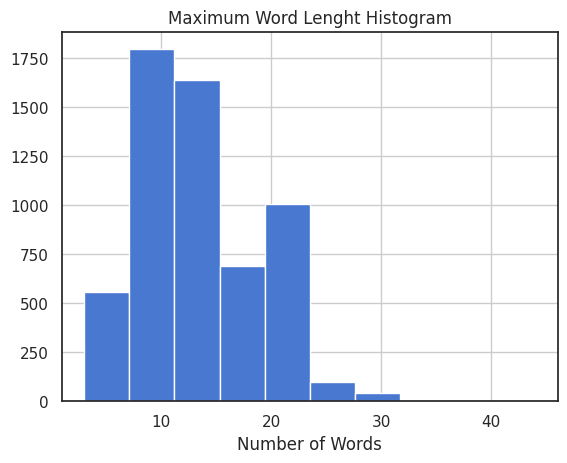

In [41]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.max(x)).hist()
plt.title('Maximum Word Lenght Histogram')
plt.xlabel('Number of Words')

In [57]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from spacy import displacy



In [50]:
# Fetch stopwords
nltk.download('stopwords')
# stop=set(stopwords.words('english')) #for english
stop=set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# Create corpus
corpus=[]
new= samples['clean_content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Text(0, 0.5, 'Words')

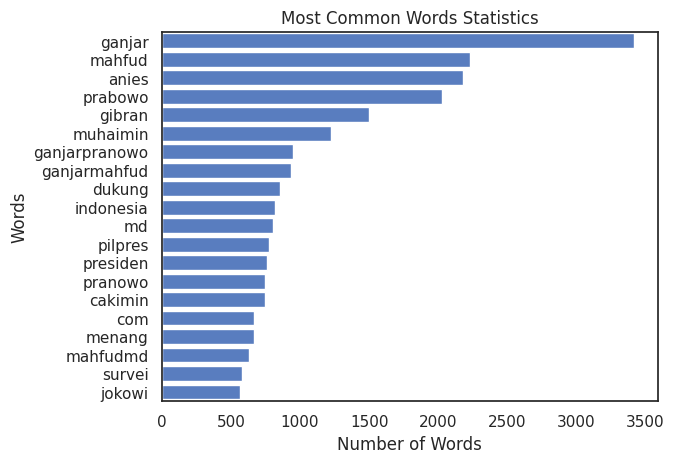

In [62]:
counter=Counter(corpus)
most=counter.most_common()

x, y=[], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title('Most Common Words Statistics')
plt.xlabel('Number of Words')
plt.ylabel('Words')

# N-Gram Analysis

In [63]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Unigram

<Axes: >

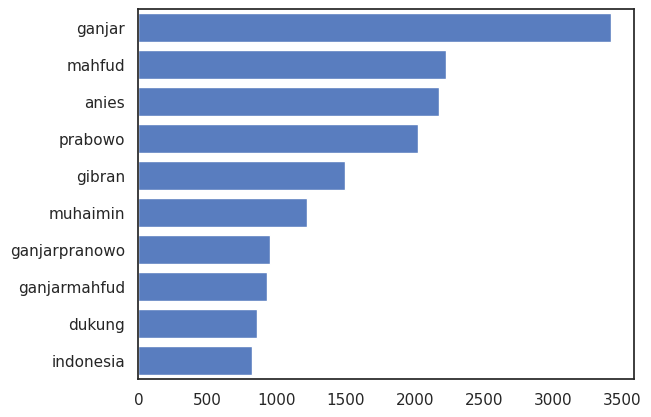

In [79]:
top_n_bigrams=get_top_ngram(samples['clean_content'],1)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Bigram

<Axes: >

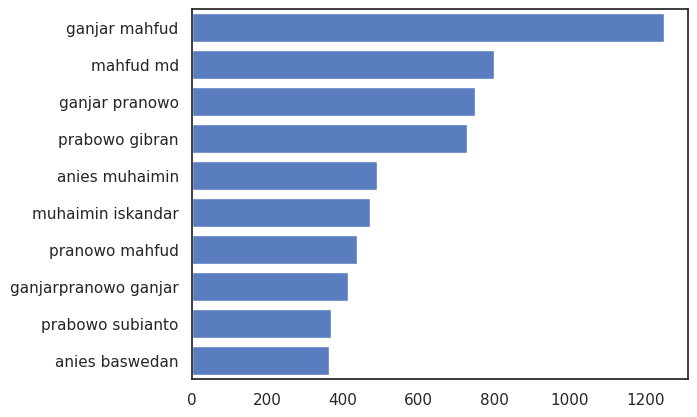

In [80]:
top_n_bigrams=get_top_ngram(samples['clean_content'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Trigram

<Axes: >

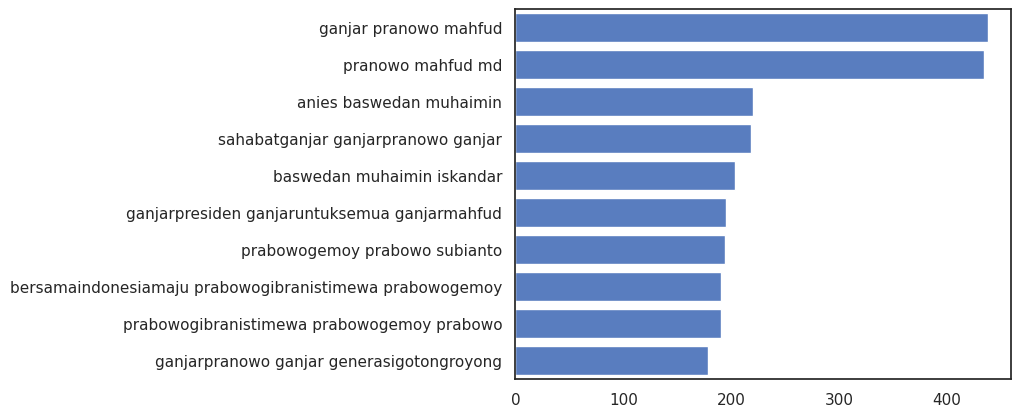

In [81]:
top_n_bigrams=get_top_ngram(samples['clean_content'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [82]:
samples.columns

Index(['likes', 'replies', 'quotes', 'retweets', 'searchQuery',
       'clean_content', 'tanggal', 'date', 'textblob_sentiment',
       'textblob_sentiment_assessment', 'textblob_polarity',
       'textblob_subject', 'vader_compound', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_sentiment'],
      dtype='object')

# Textblob 

In [ ]:
def polarity(text):
    tbx=TextBlob(text)#.translate(from_lang='id',to='en')
    # print(tbx)$
    return tbx.sentiment.polarity

<Axes: >

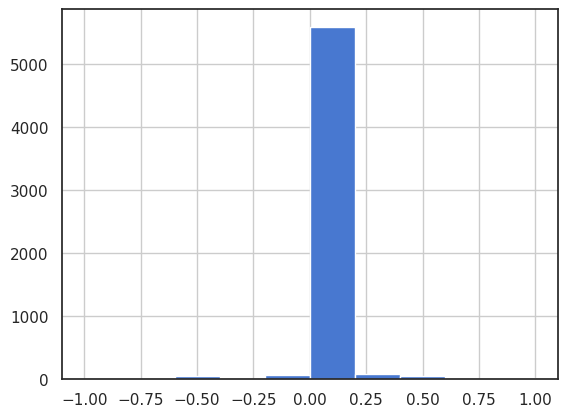

In [85]:
# samples['textblob_polarity']=samples['clean_content'].\
   # apply(lambda x : polarity(x))
samples['textblob_polarity'].hist()

<BarContainer object of 3 artists>

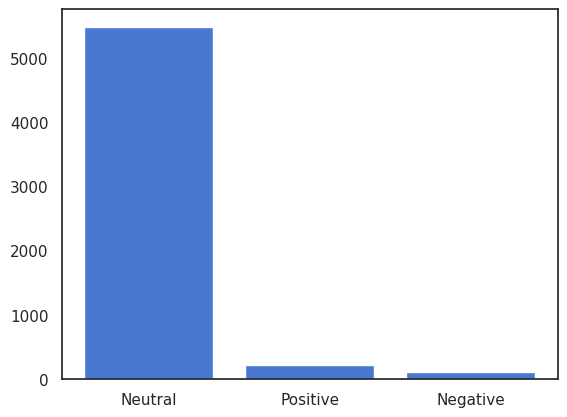

In [86]:
plt.bar(samples.textblob_sentiment.value_counts().index,
        samples.textblob_sentiment.value_counts())

# Vader

<BarContainer object of 3 artists>

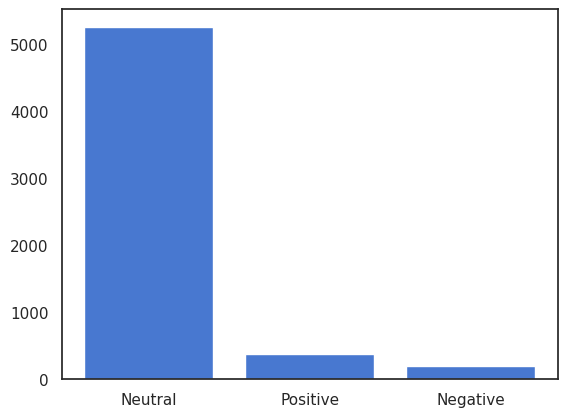

In [91]:
plt.bar(samples.vader_sentiment.value_counts().index,
        samples.vader_sentiment.value_counts())